## Imports

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sqlite3
import script_gui
import os

## Functions

In [8]:
def run_as_tkinter_instead():
    script_gui.create_gui()
    return "1"

### I don't use this function anymore because there are too many records to go through and it is a pain. I kept it here anyways just for your benefit

In [9]:
def fill_missing_values_with_user_choice(df):
    """
    Fill missing values in a DataFrame by allowing the user to choose the statistic (mean, median, mode)
    to use for each column with missing values. Skips columns with all values present or non-numerical data.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None. The function modifies the DataFrame in place by filling missing values.
    """
    for column_name in df.columns:
        if df[column_name].dtypes != 'int64' and df[column_name].dtypes != 'float64':
            print(f"Skipping column '{column_name}' with non-numeric data.")
            print("-" * 50)
            continue

        column_data = df[column_name]
        column_data_without_missing = column_data.dropna()

        if column_data.isna().any():
            # Calculate mean, median, and mode
            mean_val = column_data_without_missing.mean()
            median_val = column_data_without_missing.median()
            mode_array = stats.mode(column_data_without_missing)
            mode_val = mode_array[0][0] if isinstance(mode_array, np.ndarray) and len(mode_array[0]) > 0 else None

            print(f"Column: {column_name}")
            print(f"Mean: {mean_val:.2f}")
            print(f"Median: {median_val:.2f}")
            print(f"Mode: {mode_val}")

            # Ask user for choice of statistic
            choice = input("Choose the statistic to fill missing values (mean, median, mode, none): ").lower().strip()

            # Fill missing values based on user's choice
            if choice == 'mean':
                fill_value = mean_val
            elif choice == 'median':
                fill_value = median_val
            elif choice == 'mode':
                fill_value = mode_val
            elif choice == 'none':
                print("No missing values filled.")
            else:
                while True:
                    print("Invalid choice.")
                    choice = input("Choose the statistic to fill missing values (mean, median, mode, none): ").lower().strip()
                    if choice == 'mean':
                        fill_value = mean_val
                        break
                    elif choice == 'median':
                        fill_value = median_val
                        break
                    elif choice == 'mode':
                        fill_value = mode_val
                        break
                    elif choice == 'none':
                        print("No missing values filled.")
                        break
            df[column_name].fillna(fill_value, inplace=True)
            print(f"Missing values in column '{column_name}' filled with {choice}.")
            print("=" * 50)
            
        else:
            print(f"Skipping column '{column_name}' with no missing data.")
            print("-" * 50)
            continue

    print("Finished replacing numerical values")

In [10]:
def fill_missing_values_with_median(df):
    """
    Fill missing values in a DataFrame using the median for each column with missing values.
    Skips columns with all values present or non-numerical data.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        None. The function modifies the DataFrame in place by filling missing values with medians.
    """
    for column_name in df.columns:
        if df[column_name].dtypes != 'int64' and df[column_name].dtypes != 'float64':
            print(f"Skipping column '{column_name}' with non-numeric data.")
            print("-" * 50)
            continue

        column_data = df[column_name]

        if column_data.isna().any():
            median_val = column_data.median()

            print(f"Column: {column_name}")
            print(f"Median: {median_val:.2f}")

            df[column_name].fillna(median_val, inplace=True)
            print(f"Missing values in column '{column_name}' filled with median.")
            print("=" * 50)
            
        else:
            print(f"Skipping column '{column_name}' with no missing data.")
            print("-" * 50)
            continue

    print("Finished replacing numerical values")


## This programme can be run either as a Jupyter Notebook or as a Tkinter GUI

In [11]:
run_preference = input("Do you want to run this as Jupyter Notebook or through Tkinter? Type '1' for Jupyter and '2' for Tkinter: ")
while True:
    
    if run_preference == '1':
        break
    elif run_preference == '2':
        run_preference = run_as_tkinter_instead()
        break
    else:
        run_preference = input("Incorrect Input, try again. Do you want to run this as Jupyter Notebook or through Tkinter? Type '1' for Jupyter and '2' for Tkinter: ")


## Read the csv files as pandas

In [12]:
tx_antenna_dab = pd.read_csv(r"Data sets/TxAntennaDAB.csv")


In [13]:
tx_antenna_dab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1214 non-null   int64  
 1   NGR                 1214 non-null   object 
 2   Longitude/Latitude  1214 non-null   object 
 3   Site Height         1214 non-null   int64  
 4   In-Use Ae Ht        1214 non-null   int64  
 5   In-Use ERP Total    1210 non-null   object 
 6   Dir Max ERP         852 non-null    float64
 7   0                   1114 non-null   float64
 8   10                  1114 non-null   float64
 9   20                  1114 non-null   float64
 10  30                  1114 non-null   float64
 11  40                  1114 non-null   float64
 12  50                  1114 non-null   float64
 13  60                  1114 non-null   float64
 14  70                  1114 non-null   float64
 15  80                  1114 non-null   float64
 16  90    

In [14]:
fill_missing_values_with_median(tx_antenna_dab)

Skipping column 'id' with no missing data.
--------------------------------------------------
Skipping column 'NGR' with non-numeric data.
--------------------------------------------------
Skipping column 'Longitude/Latitude' with non-numeric data.
--------------------------------------------------
Skipping column 'Site Height' with no missing data.
--------------------------------------------------
Skipping column 'In-Use Ae Ht' with no missing data.
--------------------------------------------------
Skipping column 'In-Use ERP Total' with non-numeric data.
--------------------------------------------------
Column: Dir Max ERP
Median: 190.00
Missing values in column 'Dir Max ERP' filled with median.
Column: 0
Median: 1.50
Missing values in column '0' filled with median.
Column: 10
Median: 1.70
Missing values in column '10' filled with median.
Column: 20
Median: 1.60
Missing values in column '20' filled with median.
Column: 30
Median: 1.50
Missing values in column '30' filled with med

In [15]:
tx_params_dab = pd.read_csv(r"Data sets/TxParamsDAB.csv", encoding='ISO-8859-1')


In [16]:
tx_params_dab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Columns: 138 entries, id to Data SId 15 (Hex)
dtypes: float64(46), int64(1), object(91)
memory usage: 1.3+ MB


In [17]:
fill_missing_values_with_median(tx_params_dab)

Skipping column 'id' with no missing data.
--------------------------------------------------
Skipping column 'Date' with non-numeric data.
--------------------------------------------------
Skipping column 'Ensemble' with non-numeric data.
--------------------------------------------------
Skipping column 'Licence' with non-numeric data.
--------------------------------------------------
Skipping column 'Ensemble Area' with non-numeric data.
--------------------------------------------------
Skipping column 'EID' with non-numeric data.
--------------------------------------------------
Skipping column 'Transmitter Area' with non-numeric data.
--------------------------------------------------
Skipping column 'Site' with non-numeric data.
--------------------------------------------------
Skipping column 'Freq.' with no missing data.
--------------------------------------------------
Skipping column 'Block' with non-numeric data.
--------------------------------------------------
Skipp

c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\RuyZambrano\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

In [18]:
tx_antenna_dab = tx_antenna_dab.merge(tx_params_dab, how='left', on='id')

## Transform the data per the client's requests

In [19]:
# Filter out rows with specific 'NGR' values
ngrs_to_exclude = ['NZ02553847', 'SE213515', 'NT05399374', 'NT25265908']
tx_antenna_dab = tx_antenna_dab[~tx_antenna_dab['NGR'].isin(ngrs_to_exclude)]


In [20]:
tx_antenna_dab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1213
Columns: 182 entries, id to Data SId 15 (Hex)
dtypes: float64(85), int64(3), object(94)
memory usage: 1.7+ MB


In [21]:
# Extract the DAB multiplexes from 'EID' into new columns
dab_multiplexes = ['C18A', 'C18F', 'C188']
for multiplex in dab_multiplexes:
    tx_antenna_dab[multiplex] = tx_antenna_dab['EID'].str.contains(multiplex).astype(int)

In [22]:
# Rename columns and convert 'In-Use Ae Ht' and 'In-Use ERP Total' to numeric values
tx_antenna_dab.rename(columns={'In-Use Ae Ht': 'Aerial height (m)', 'In-Use ERP Total': 'Power (kW)'}, inplace=True)

# Convert columns to string and then perform 'str.replace' and 'astype' operations
tx_antenna_dab['Aerial height (m)'] = tx_antenna_dab['Aerial height (m)'].astype(str).str.replace(',', '').astype(float)
tx_antenna_dab['Power (kW)'] = tx_antenna_dab['Power (kW)'].astype(str).str.replace(',', '').astype(float)



In [23]:
# Convert 'Date' column to datetime type
tx_antenna_dab['Date'] = pd.to_datetime(tx_antenna_dab['Date'])

C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_17532\2143437118.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  tx_antenna_dab['Date'] = pd.to_datetime(tx_antenna_dab['Date'])


In [24]:
json_data = tx_antenna_dab.to_json(orient='records')

In [25]:
conn = sqlite3.connect(r'Data sets/dab_dataset_full.db')
cursor = conn.cursor()

In [26]:
cursor.execute('''CREATE TABLE IF NOT EXISTS tx_antenna_dab (data JSON)''')

In [27]:
cursor.execute("INSERT INTO tx_antenna_dab (data) VALUES (?)", (json_data,))


In [28]:
conn.commit()
conn.close()


## Get the mean median and mode

In [29]:
# Filter the data for each multiplex value (C18A, C18F, C188) within the filtered data
c18a_data = tx_antenna_dab[tx_antenna_dab['C18A'] == 1]
c18f_data = tx_antenna_dab[tx_antenna_dab['C18F'] == 1]
c188_data = tx_antenna_dab[tx_antenna_dab['C188'] == 1]

# Filter the data for 'Site Height' more than 75 and 'Date' from 2001 onwards
filtered_c18a_data = c18a_data[(c18a_data['Site Height'] > 75) & (c18a_data['Date'] >= '2001-01-01')]
filtered_c18f_data = c18f_data[(c18f_data['Site Height'] > 75) & (c18f_data['Date'] >= '2001-01-01')]
filtered_c188_data = c188_data[(c188_data['Site Height'] > 75) & (c188_data['Date'] >= '2001-01-01')]


# Extract the 'Power (kW)' values for each multiplex within the filtered data
c18a_power_values = filtered_c18a_data['Power (kW)'].dropna().astype(float)
c18f_power_values = filtered_c18f_data['Power (kW)'].dropna().astype(float)
c188_power_values = filtered_c188_data['Power (kW)'].dropna().astype(float)

# Calculate the mean, median, and mode for each set of 'Power (kW)' values
mean_c18a = c18a_power_values.mean()
median_c18a = c18a_power_values.median()
mode_c18a = stats.mode(c18a_power_values).mode[0]

mean_c18f = c18f_power_values.mean()
median_c18f = c18f_power_values.median()
mode_c18f = stats.mode(c18f_power_values).mode[0]

mean_c188 = c188_power_values.mean()
median_c188 = c188_power_values.median()
mode_c188 = stats.mode(c188_power_values).mode[0]

# Display the results
print("C18A Data:")
print("\tMean:\t", mean_c18a)
print("\tMedian:\t", median_c18a)
print("\tMode:\t", mode_c18a, "\n")

print("="*50)

print("\nC18F Data:")
print("\tMean:\t", mean_c18f)
print("\tMedian:\t", median_c18f)
print("\tMode:\t", mode_c18f, "\n")

print("="*50)

print("\nC188 Data:")
print("\tMean:\t", mean_c188)
print("\tMedian:\t", median_c188)
print("\tMode:\t", mode_c188)


C18A Data:
	Mean:	 0.68610925
	Median:	 0.8586185
	Mode:	 0.0272 


C18F Data:
	Mean:	 2.3257456666666667
	Median:	 1.0
	Mode:	 0.977237 


C188 Data:
	Mean:	 0.4999998
	Median:	 0.3
	Mode:	 0.3


C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_17532\1109464286.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_c18a = stats.mode(c18a_power_values).mode[0]
C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_17532\1109464286.py:24: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False

## Visualisation


In [30]:
# Prepare the data for DAB multiplexes
column_data = ['Site', 'Freq.', 'Block', 'Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ','Serv Label10 ']

# Separate the categories
c18a_visualisation_data = c18a_data[column_data]
c18f_visualisation_data = c18f_data[column_data]
c188_visualisation_data = c188_data[column_data]

# Concatenate the categories into one dataframe
dab_multiplex_data = pd.concat([c18a_visualisation_data, c18f_visualisation_data, c188_visualisation_data])


In [31]:
# Print the columns to see what visualisations to do 
for column in column_data:
    print('\n', column)
    print(dab_multiplex_data[column].unique())




 Site
['Athelstaneford' 'Black Hill' 'Braid Hills' 'CRAIGKELLY'
 'Earls Hill - DAB' 'EDINBURGH CASTLE' 'Beecroft Hill' 'Emley Moor'
 'Morley' 'Burnhope' 'Cale Cross House' 'DURHAM' 'Fenham' 'Hendon'
 'Kenton TE' 'MORPETH' 'NEWTON' 'Peppermoor Farm' 'SHOTLEYFIELD'
 'Whitley Bay']



 Freq.
[229.072 220.352]



 Block
['12D' '11C']



 Serv Label1 
['Forth One' 'Grt Hits Leeds' 'METRO Radio']



 Serv Label2 
['FORTH 2' 'Smooth UK' 'Grt Hits N East']



 Serv Label3 
['Heart' 'Absolute  C Rock' 'Smooth Radio']



 Serv Label4 
['HITS RADIO UK' 'Magic Chilled']



 Serv Label10 
['Magic Soul' 'Absolute Country']


In [32]:
# Print the columns to see what visualisations to do 
for column in column_data:
    print('\n\n\n', column)
    print(c18a_visualisation_data[column].unique())




 Site
['Athelstaneford' 'Black Hill' 'Braid Hills' 'CRAIGKELLY'
 'Earls Hill - DAB' 'EDINBURGH CASTLE']



 Freq.
[229.072]



 Block
['12D']



 Serv Label1 
['Forth One']



 Serv Label2 
['FORTH 2']



 Serv Label3 
['Heart']



 Serv Label4 
['HITS RADIO UK']



 Serv Label10 
['Magic Soul']


In [33]:
# Print the columns to see what visualisations to do 
for column in column_data:
    print('\n\n\n', column)
    print(c18f_visualisation_data[column].unique())




 Site
['Beecroft Hill' 'Emley Moor' 'Morley']



 Freq.
[229.072]



 Block
['12D']



 Serv Label1 
['Grt Hits Leeds']



 Serv Label2 
['Smooth UK']



 Serv Label3 
['Absolute  C Rock']



 Serv Label4 
['Magic Chilled']



 Serv Label10 
['Absolute Country']


In [34]:
# Print the columns to see what visualisations to do 
for column in column_data:
    print('\n\n\n', column)
    print(c188_visualisation_data[column].unique())




 Site
['Burnhope' 'Cale Cross House' 'DURHAM' 'Fenham' 'Hendon' 'Kenton TE'
 'MORPETH' 'NEWTON' 'Peppermoor Farm' 'SHOTLEYFIELD' 'Whitley Bay']



 Freq.
[220.352]



 Block
['11C']



 Serv Label1 
['METRO Radio']



 Serv Label2 
['Grt Hits N East']



 Serv Label3 
['Smooth Radio']



 Serv Label4 
['HITS RADIO UK']



 Serv Label10 
['Magic Soul']


In [35]:
dab_multiplex_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 758 to 1200
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           20 non-null     object 
 1   Freq.          20 non-null     float64
 2   Block          20 non-null     object 
 3   Serv Label1    20 non-null     object 
 4   Serv Label2    20 non-null     object 
 5   Serv Label3    20 non-null     object 
 6   Serv Label4    20 non-null     object 
 7   Serv Label10   20 non-null     object 
dtypes: float64(1), object(7)
memory usage: 1.4+ KB


In [36]:
print(dab_multiplex_data)

                  Site    Freq. Block    Serv Label1      Serv Label2    
758     Athelstaneford  229.072   12D       Forth One          FORTH 2  \
759         Black Hill  229.072   12D       Forth One          FORTH 2   
760        Braid Hills  229.072   12D       Forth One          FORTH 2   
761         CRAIGKELLY  229.072   12D       Forth One          FORTH 2   
762   Earls Hill - DAB  229.072   12D       Forth One          FORTH 2   
763   EDINBURGH CASTLE  229.072   12D       Forth One          FORTH 2   
841      Beecroft Hill  229.072   12D  Grt Hits Leeds        Smooth UK   
842         Emley Moor  229.072   12D  Grt Hits Leeds        Smooth UK   
844             Morley  229.072   12D  Grt Hits Leeds        Smooth UK   
1189          Burnhope  220.352   11C     METRO Radio  Grt Hits N East   
1190  Cale Cross House  220.352   11C     METRO Radio  Grt Hits N East   
1191            DURHAM  220.352   11C     METRO Radio  Grt Hits N East   
1192            Fenham  220.352   11C 

### Create a directory to save the images

In [37]:

images_dir = "visualization_images"
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

### Create and save each graph as a separate image

In [38]:
sns.set(style="whitegrid")  # Set the style for all plots

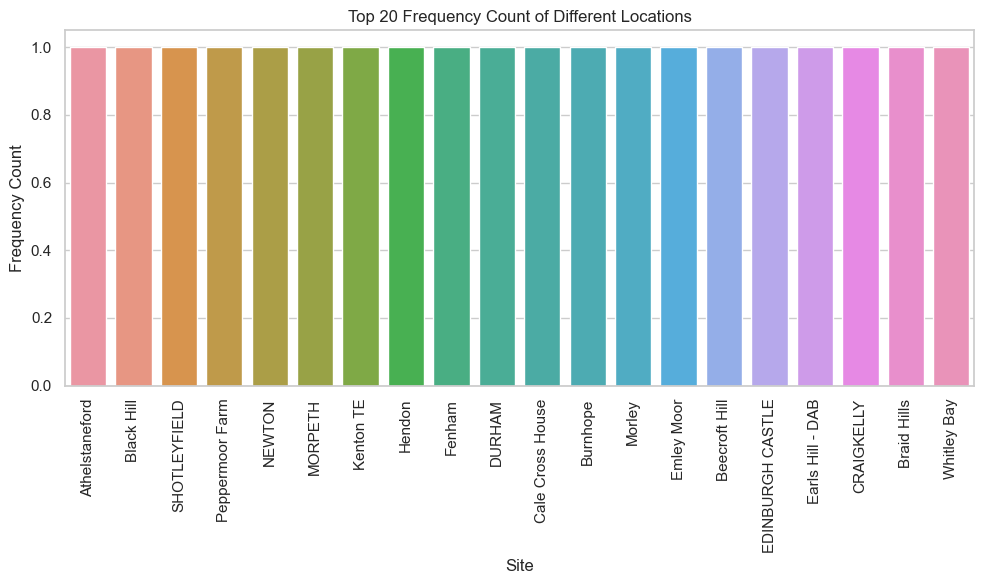

In [39]:
# Specify the number of top locations you want to display
n_top_locations = 20

# Get the top N locations and their counts
top_locations = dab_multiplex_data['Site'].value_counts().head(n_top_locations)

# Create a barchart
plt.figure(figsize=(10, 6))
sns.countplot(data=dab_multiplex_data, x='Site', order=top_locations.index)
plt.xticks(rotation=90)
plt.xlabel('Site')
plt.ylabel('Frequency Count')
plt.title(f'Top {n_top_locations} Frequency Count of Different Locations')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, f'top_{n_top_locations}_frequency_count.png'))
plt.show()

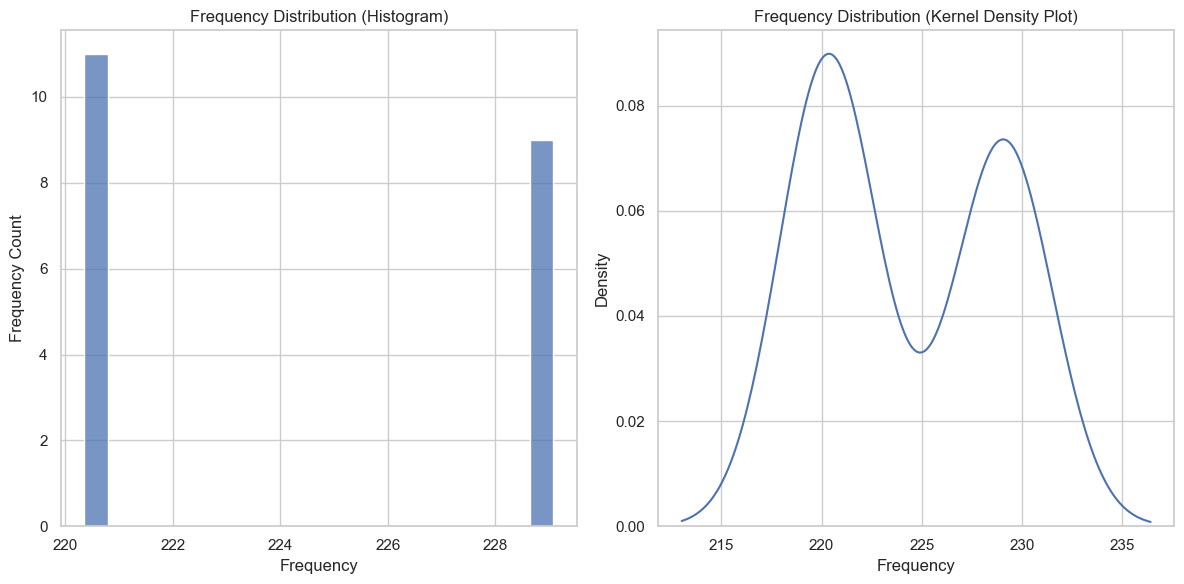

In [40]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Create a histogram
plt.subplot(1, 2, 1)
sns.histplot(data=dab_multiplex_data, x='Freq.', bins=20, kde=False)
plt.xlabel('Frequency')
plt.ylabel('Frequency Count')
plt.title('Frequency Distribution (Histogram)')

# Create a kernel density plot
plt.subplot(1, 2, 2)
sns.kdeplot(data=dab_multiplex_data, x='Freq.')
plt.xlabel('Frequency')
plt.ylabel('Density')
plt.title('Frequency Distribution (Kernel Density Plot)')

# Adjust layout and show the plot
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, 'frequency_distribution.png'))
plt.show()


C:\Users\RuyZambrano\AppData\Local\Temp\ipykernel_17532\2499918550.py:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(data=dab_multiplex_data, x='Block', bins=len(dab_multiplex_data['Block'].unique()),


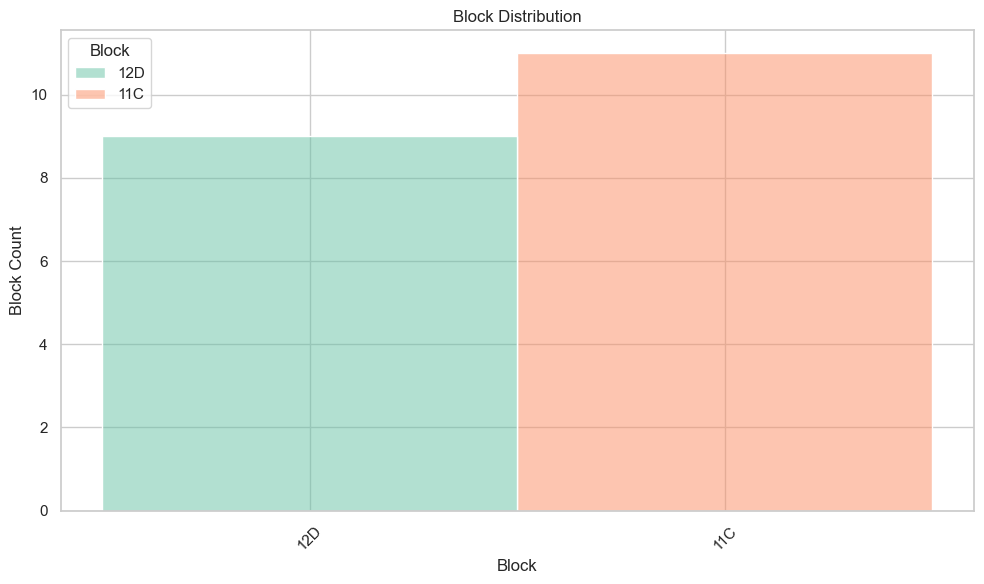

In [41]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Define custom colors for each block value
colours = sns.color_palette("Set2")

# Create a histogram for block distribution with custom colors using the palette parameter
sns.histplot(data=dab_multiplex_data, x='Block', bins=len(dab_multiplex_data['Block'].unique()), 
                kde=False, hue='Block', palette=colours)
plt.xlabel('Block')
plt.ylabel('Block Count')
plt.title('Block Distribution')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, 'block_distribution.png'))
plt.show()


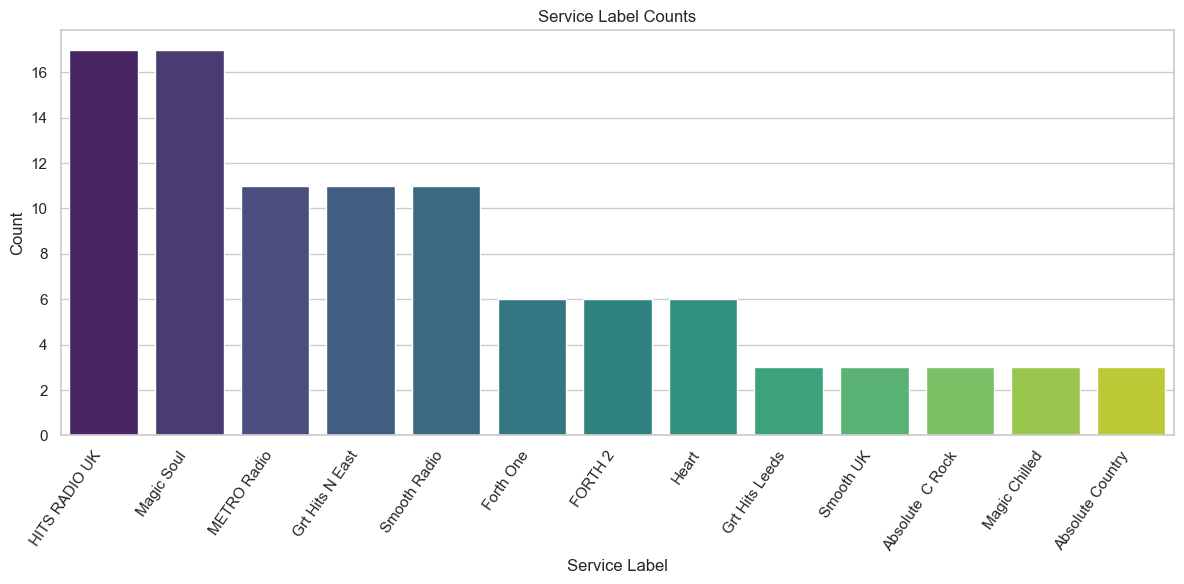

In [42]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Gather the unique service labels
service_labels = dab_multiplex_data[['Serv Label1 ', 'Serv Label2 ', 'Serv Label3 ', 'Serv Label4 ', 'Serv Label10 ']].values.ravel()

# Calculate the counts of each unique service label
service_label_counts = pd.Series(service_labels).value_counts()

# Create a bar plot for unique service label counts
sns.barplot(x=service_label_counts.index, y=service_label_counts.values, palette='viridis')
plt.xlabel('Service Label')
plt.ylabel('Count')
plt.title('Service Label Counts')
plt.xticks(rotation=55, ha='right')

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'service_label_counts.png'))

plt.show()


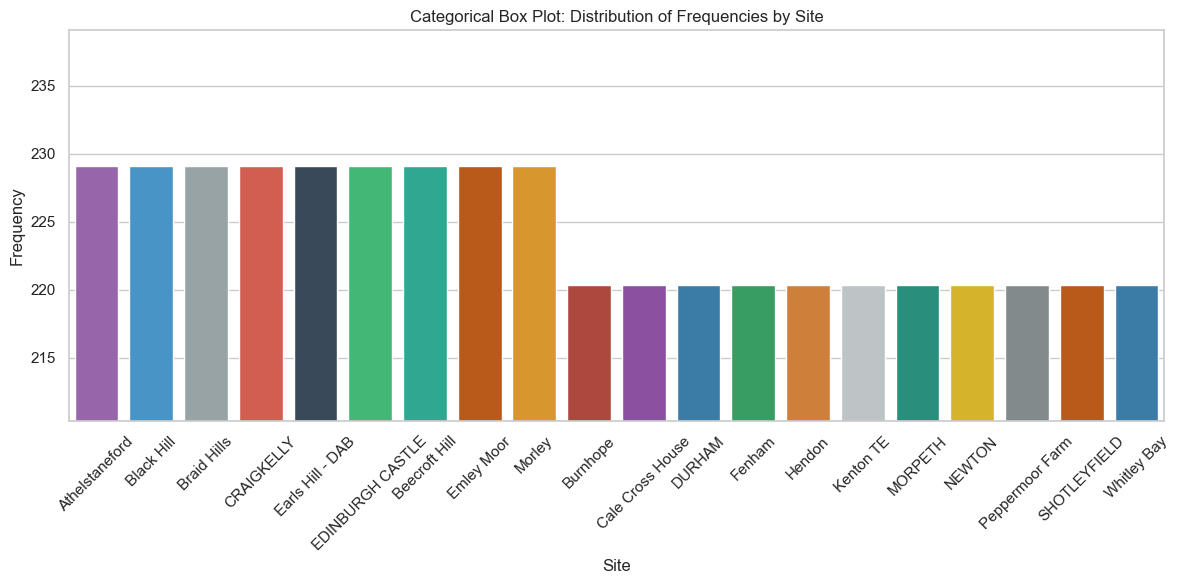

In [43]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Calculate the min and max frequency value
min_frequency = dab_multiplex_data['Freq.'].min()
max_frequency = dab_multiplex_data['Freq.'].max()

flatui_palette = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71",
                  "#1abc9c", "#d35400", "#f39c12", "#c0392b", "#8e44ad", "#2980b9",
                  "#27ae60", "#e67e22", "#bdc3c7", "#16a085", "#f1c40f", "#7f8c8d",
                  "#d35400", "#2980b9"])

# Create a box plot for distribution of frequencies by Service Label
sns.barplot(data=dab_multiplex_data, x='Site', y='Freq.',
                palette=flatui_palette)
plt.xlabel('Site')
plt.ylabel('Frequency')
plt.title('Categorical Box Plot: Distribution of Frequencies by Site')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Scale the y axis
plt.ylim((min_frequency-10), (max_frequency+10))
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, 'service_label_counts.png'))

plt.show()



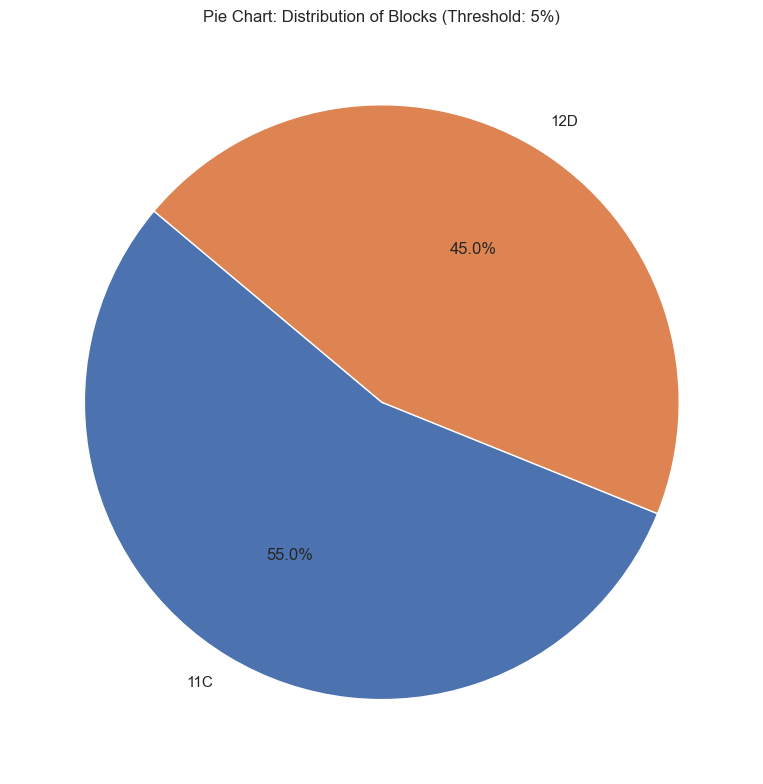

In [44]:
# Calculate the value counts for each block
block_value_counts = dab_multiplex_data['Block'].value_counts()

# Set a threshold for the percentage value to show
percentage_threshold = 5  # Only show percentage for slices above 5%

# Filter blocks that meet the threshold
filtered_blocks = block_value_counts[block_value_counts > percentage_threshold]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_blocks, labels=filtered_blocks.index, autopct=lambda p: '{:.1f}%'.format(p) if p > percentage_threshold else '', startangle=140)
plt.title(f'Pie Chart: Distribution of Blocks (Threshold: {percentage_threshold}%)')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, f'distribution_of_blocks_pie.png'))
plt.show()

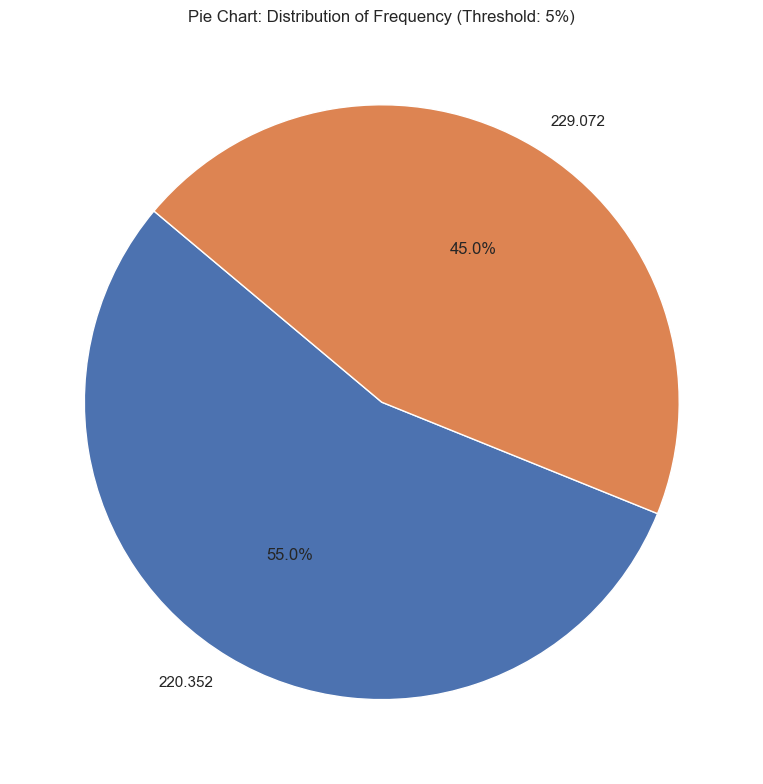

In [45]:
# Calculate the value counts for each block
freq_value_counts = dab_multiplex_data['Freq.'].value_counts()

# Set a threshold for the percentage value to show
percentage_threshold = 5  # Only show percentage for slices above 5%

# Filter blocks that meet the threshold
filtered_freq = freq_value_counts[freq_value_counts > percentage_threshold]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_freq, labels=filtered_freq.index, autopct=lambda p: '{:.1f}%'.format(p) if p > percentage_threshold else '', startangle=140)
plt.title(f'Pie Chart: Distribution of Frequency (Threshold: {percentage_threshold}%)')
plt.tight_layout()

# Save as a PNG
plt.savefig(os.path.join(images_dir, f'distribution_of_frequency_pie.png'))
plt.show()

In [46]:
# Create a copy of the original DataFrame to avoid modifying the original data
dab_multiplex_data_encoded = dab_multiplex_data.copy()

# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in dab_multiplex_data_encoded.columns:
    if dab_multiplex_data_encoded[column].dtype == 'object':
        dab_multiplex_data_encoded[column] = label_encoder.fit_transform(dab_multiplex_data_encoded[column].astype(str))

In [47]:
correlation_matrix = dab_multiplex_data_encoded.corr()

In [48]:
print(correlation_matrix)

                   Site     Freq.     Block  Serv Label1   Serv Label2    
Site           1.000000 -0.566461 -0.566461      0.610701      0.364703  \
Freq.         -0.566461  1.000000  1.000000     -0.934353     -0.253629   
Block         -0.566461  1.000000  1.000000     -0.934353     -0.253629   
Serv Label1    0.610701 -0.934353 -0.934353      1.000000      0.581675   
Serv Label2    0.364703 -0.253629 -0.253629      0.581675      1.000000   
Serv Label3    0.412996 -0.902671 -0.902671      0.690066     -0.187317   
Serv Label4   -0.060710  0.464420  0.464420     -0.118345      0.738866   
Serv Label10   0.060710 -0.464420 -0.464420      0.118345     -0.738866   

               Serv Label3   Serv Label4   Serv Label10   
Site               0.412996     -0.060710       0.060710  
Freq.             -0.902671      0.464420      -0.464420  
Block             -0.902671      0.464420      -0.464420  
Serv Label1        0.690066     -0.118345       0.118345  
Serv Label2       -0.187317  

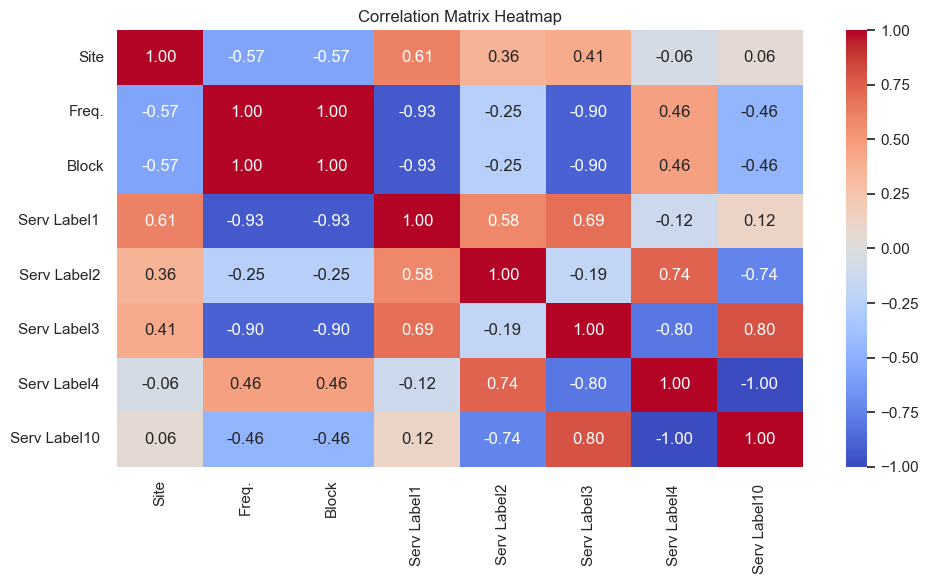

In [49]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'correlation_matrix_heatmap.png'))
plt.show()